## Energy resolution to energy <a class="anchor" id="section-1"></a>
- [Energy resolution to energy](#section-1)
- [Time domain](#section-2)

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from funcs import velocity, decorate, time_of_flight

fig, ax = plt.subplots(dpi=600)

x_start = 500
x_end = 1500
x_interval = 250
y_start = 0
y_end = 2
y_interval = 0.2

t_resolution = 0.30349e-9
x = np.arange(x_start, x_end, 1)
for E in range(1, 201, 50):
    g = 2*velocity(E)*t_resolution*E/x
    idx = np.argwhere(np.diff(np.sign(0.85 - g))).flatten()
    print(x[idx])
    ax.plot(x, g)
y = np.arange(y_start, y_end, 0.01)
ax.plot(1120+np.zeros(shape=(len(y),)), y)

decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
         'L, mm', r"$\Delta E,~eV$")
print("t1 =", time_of_flight(6.84))

## Time domain <a class="anchor" id="section-2"></a>

Fitted parameters:
t0 = 1.861070140044798 ns
E0 = 0.020707642939438824 eV
s = 1122.3120672763696 mm


,"Energy, eV","Theory, ns","t, ns","dt, ns","dt/t, %","dE/E, %","dE, eV","Sigma, ns"
0,14.40,497.634663,500.801742,0.677951,0.135373,0.270746,0.019494,0.000004
1,13.08,522.141242,525.467617,0.809419,0.154038,0.308076,0.020148,0.026216
2,11.27,562.509565,565.995547,0.719780,0.127171,0.254341,0.014332,0.000004
3,9.95,598.660121,602.273357,1.232203,0.204592,0.409184,0.020357,0.000009
4,8.16,661.068997,665.038522,1.053416,0.158399,0.316798,0.012925,0.000016
5,6.84,722.044258,726.437578,2.320829,0.319481,0.638962,0.021852,0.000024


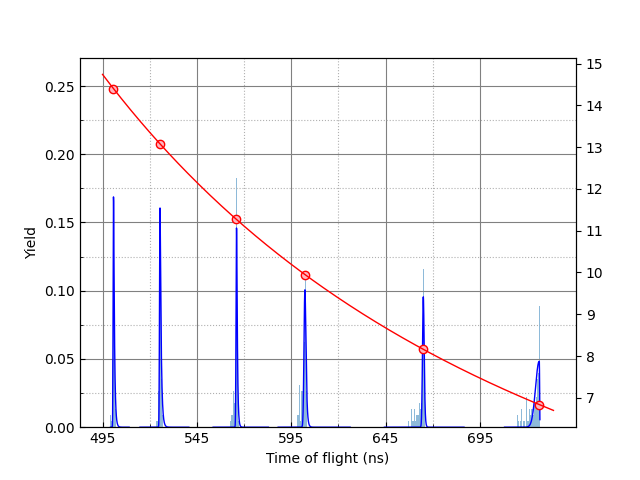

In [ ]:
%matplotlib widget

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from funcs import *

fig, ax = plt.subplots()

x_start=495
x_end = 700
x_interval = 50
y_start = 0
y_end = 0.25
y_interval = 0.05
decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
          r"Time of flight (ns)", r"Yield", set=False)

data = read_file('./data/6k_low.txt', delimeter=None)[0]
y, x, _ = plt.hist(data, 3000, alpha=0.5, density=True)
x = (x[1:] + x[:-1])/2

times, sigmas, widths = [], [], []
energies = [14.40, 13.08, 11.27, 9.95, 8.16, 6.84]
straight_times = time_of_flight(np.array(energies))

bins = [(0, 509.2), (514.9, 540.8), (553.7, 583), (588.1, 626.4), (644.4, 686.7), (708.1, 732.3)]
for i, lim in enumerate(bins):
    start, stop = get_bins(lim, x)
    peak_x, sig, width = approximate(x[start:stop], y[start:stop],
                                     (straight_times[i], 1, 0, 1, 1), ax)
    times.append(peak_x)
    sigmas.append(sig)
    widths.append(width)

times, sigmas, widths = np.array(times), np.array(sigmas), np.array(widths)

xr = np.arange(495, 735, 1)
params, _ = curve_fit(time_to_energy, times, energies, (0, 0, 1117))
print(f"Fitted parameters:\nt0 = {params[0]*1e9} ns\nE0 = {params[1]} eV\ns = {params[2]} mm")

ax2 = ax.twinx()
ax2.scatter(times, energies, facecolors='#FFB6C1', edgecolors='r')
ax2.plot(xr, time_to_energy(xr, *params), lw=1, c='red')

d = {
    "Energy, eV": energies[:len(times)],
    "Theory, ns": straight_times[:len(times)],
    "t, ns": times,
    "dt, ns": widths,
    "dt/t, %": widths/times*100,
    "dE/E, %": widths/times*200,
    "dE, eV": widths/times*energies,
    "Sigma, ns": sigmas,
}
df = pd.DataFrame(data=d)
df

## Yield graph <a class="anchor" id="section-3"></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(dpi=600)
x_start = 400
x_end = 750
x_interval = 50
y_start = 0
y_end = 3000
y_interval = 500

tof, counts = read_file('./data/6k_low.txt', delimeter=None)
ax.scatter(tof, counts, s=0.5, c="black")
decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
    r"Time of flight (ns)", r"Total yield", set=True)

## Energy domain <a class="anchor" id="section-4"></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

x_start = 191

x_end = 200

x_interval = 1
y_start = 0
y_end = 1

y_interval = 0.1

x = np.arange(x_start, x_end, 1)

fig, ax = plt.subplots()

fig.set_dpi(600)
x = []
y = []

with open("./data/ener.txt", "r") as f:

    while True:

        s = f.readline()

        if s == "":

            break
        a = s.split()

        x.append(float(a[0]))

        y.append(float(a[1]))

y /= np.max(y)

x_e = list()
y_e = list()


for i, el in enumerate(x):

    xx = (9.1093837e-31 * (1.120 / el / 1e-9) ** 2) / 2  # joules

    x_e.append(6.242e18 * xx)  # ev


for i, el in enumerate(y):

    yy = el * 1.120 * np.sqrt(9.1093837e-31) / (2 * x_e[i]) ** 1.5
    y_e.append(yy)


x_e = x_e[::-1]

y_e = y_e[::-1]

y_e /= np.max(y_e)

ax.bar(x_e, y_e, width=(x_e[-1] - x_e[0]) / 100, alpha=0.5)


ax.set_xlabel(r"Electron energy (eV)")

ax.set_ylabel(r"Yield")

ax.tick_params(which="both", direction="in")

ax.grid(True, which="major", ls="-", c="gray")

ax.grid(True, which="minor", ls=":")

ax.set_xticks(np.arange(x_start, x_end + 1, x_interval))

ax.set_xticks(np.arange(x_start, x_end + 1, x_interval / 2), minor=True)

ax.set_yticks(np.arange(y_start, y_end + 1, y_interval))

ax.set_yticks(np.arange(y_start, y_end + 1, y_interval / 2), minor=True)

ax.set(xlim=(x_start, x_end), ylim=(y_start, y_end))
print()


def gauss(x, mu, sigma, A):

    return A * exp(-((x - mu) ** 2) / 2 / sigma**2)


res = 1.75 / 2.4


def velocity(E):

    return np.sqrt(2 * E * 1.60218e-19 / 9.1093837e-31) * 1e3  # mm/s


def t(E):  # ns

    return 1120 / velocity(E) * 1e9


times = list()
sigmas = list()


def approx_gauss(x, y, p0):

    params, cov = curve_fit(gauss, x, y, p0)

    sigma = sqrt(diag(cov))

    plot(x, gauss(x, *params), color="blue", lw=1)

    return (params[0], sigma[0])


p, s = approx_gauss(x_e[:12], y_e[:12], (192, res, 0))
times.append(p)
sigmas.append(s)


p, s = approx_gauss(x_e[11:24], y_e[11:24], (193, res, 0))
times.append(p)
sigmas.append(s)


p, s = approx_gauss(x_e[23:34], y_e[23:34], (194, res, 0))
times.append(p)
sigmas.append(s)


p, s = approx_gauss(x_e[34:45], y_e[34:45], (195, res, 0))
times.append(p)
sigmas.append(s)


p, s = approx_gauss(x_e[44:57], y_e[44:57], (196, res, 0))
times.append(p)
sigmas.append(s)


p, s = approx_gauss(x_e[56:67], y_e[56:67], (197, res, 0))
times.append(p)
sigmas.append(s)


p, s = approx_gauss(x_e[66:78], y_e[66:78], (198, res, 0))
times.append(p)
sigmas.append(s)


p, s = approx_gauss(x_e[77:89], y_e[77:89], (199, res, 0))
times.append(p)
sigmas.append(s)


p, s = approx_gauss(x_e[88:], y_e[88:], (200, res, 0))
times.append(p)
sigmas.append(s)


d = {

    "Energy, eV": [192, 193, 194, 195, 196, 197, 198, 199, 200],

    "Experiment, ns": [
        times[0],
        times[1],

        times[2],

        times[3],

        times[4],

        times[5],

        times[6],

        times[7],

        times[8],
    ],

    "Sigma, ns": [
        sigmas[0],
        sigmas[1],

        sigmas[2],

        sigmas[3],

        sigmas[4],

        sigmas[5],

        sigmas[6],

        sigmas[7],

        sigmas[8],
    ],

    "Ex/Th": [

        times[0] / 192,

        times[1] / 193,

        times[2] / 194,

        times[3] / 195,

        times[4] / 196,

        times[5] / 197,

        times[6] / 198,

        times[7] / 199,

        times[8] / 200,
    ],

}

df = pd.DataFrame(data=d)

print(x_e[0] - x_e[10])

df

## Bundle's deviation <a class="anchor" id="section-5"></a>

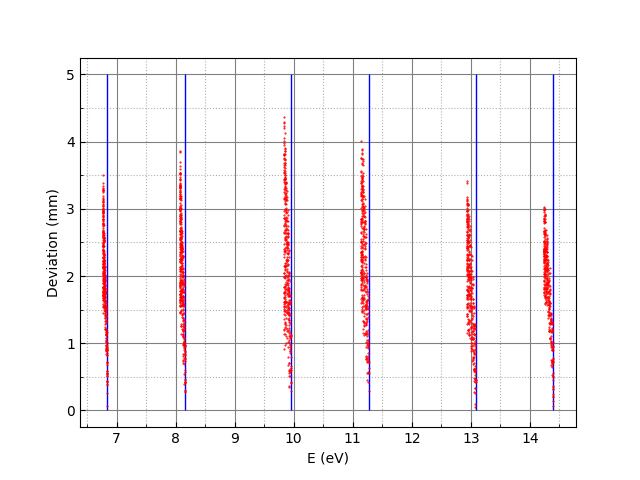

In [6]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from funcs import *

fig, ax = plt.subplots()
x_start = 6
x_end = 15
x_interval = 1
y_start = 0
y_end = 5
y_interval = 1
decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
          r"E (eV)", r"Deviation (mm)", set=False)

x = np.arange(x_start, x_end, 1)
energies = [14.40, 13.08, 11.27, 9.95, 8.16, 6.84]
e, r = [], []
with open("./data/dist_coords_low.txt", "r") as f_c:
    with open("./data/dist_energies_low.txt", "r") as f_e:
        while True:
            s_c = f_c.readline()
            s_e = f_e.readline()
            if s_c == "" or s_e == "":
                break
            num_c = s_c.split()
            num_e = s_e.split()
            if float(num_c[2]) == 1127.0:
                r.append(np.sqrt(float(num_c[1]) ** 2 + float(num_c[3]) ** 2))
                e.append(float(num_e[1]))

ax.scatter(e, r, s=0.25, c="red", zorder=3)
ax.vlines(energies, 0, 5, lw=1, color='b')

## Fourier transform <a class="anchor" id="section-6"></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.fft import rfft, rfftfreq, irfft
from scipy.signal import find_peaks

x = np.arange(x_start, x_end, 1)
fig, axs = plt.subplots(nrows=2)
fig.set_dpi(600)

d1, b = [], []
with open("6k_hist.txt", "r") as f:
    while True:
        s = f.readline()
        if s == "":
            break
        a = s.split()
        d1.append(float(a[0]))
        b.append(float(a[1]))
for i, ax in enumerate(axs):
    if i == 1:
        x_start = 133
        x_end = 140
        x_interval = 1
        y_start = 0
        y_end = 0.6
        y_interval = 0.1
    else:
        x_start = 0
        x_end = 0.5
        x_interval = 0.05
        y_start = 0
        y_end = 7
        y_interval = 1
    ax.set_xlabel(r"$t,~ns$")
    ax.set_ylabel(r"$Yield$")
    ax.tick_params(which="both", direction="in")
    ax.grid(True, which="major", ls="-", c="gray")
    ax.grid(True, which="minor", ls=":")
    ax.set_xticks(np.arange(x_start, x_end + 1, x_interval))
    ax.set_xticks(np.arange(x_start, x_end + 1, x_interval / 2), minor=True)
    ax.set_yticks(np.arange(y_start, y_end + 1, y_interval))
    ax.set_yticks(np.arange(y_start, y_end + 1, y_interval / 2), minor=True)
    ax.set(xlim=(x_start, x_end), ylim=(y_start, y_end))

n = 200
y, x, _ = hist(d1, n, alpha=0.5, density=True)
x = (x[1:] + x[:-1]) / 2

N = 1000
yf = rfft(y, N)
xf = rfftfreq(N)
lows, _ = find_peaks(np.abs(yf[:n]), height=3)
print(lows)
yf[7: lows[0] - 7] = 0
yf[lows[0] + 7: lows[1] - 7] = 0
yf[lows[1] + 7: -1] = 0
iyf = irfft(yf)

axs[0].plot(xf, np.abs(yf), lw=0.5, c="red")
axs[1].plot(x, np.abs(iyf[:n]), lw=0.5, c="red")

axs[0].plot(xf[lows], np.abs(yf[lows]), "x")
peaks, _ = find_peaks(np.abs(iyf[:n]), height=0)
print(x[peaks])
axs[1].plot(x[peaks], np.abs(iyf[peaks]), "x")


def velocity(E):
    return np.sqrt(2 * E * 1.60218e-19 / 9.1093837e-31) * 1e3  # mm/s


def t(E):  # ns
    return 1120 / velocity(E) * 1e9


tts = [t(200), t(199), t(198), t(197), t(196), t(195), t(194), t(193), t(192)]
print(x[peaks][:9] / tts)
# [1.00101351 1.0010593  1.00108595 1.00109336 1.00108144 1.00105008
# 1.00099919 1.00092867 1.0008384 ]
# [1.00101351 1.0010593  1.00108595 1.00109336 1.00108144 1.00105008
# 1.00099919 1.00070024 1.00061057]

## Energy resolution <a class="anchor" id="section-7"></a>

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from funcs import velocity

fig, ax = plt.subplots(dpi=600)
x_start = 0
x_end = 200
x_interval = 25
y_start = 0
y_end = 1
y_interval = 0.1
decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
          r"Energy (eV)", r"$\Delta$E (eV)", set=True)

E = np.arange(x_start, x_end + 1, 1)
ax.plot(E, 2 * velocity(E) * 0.30349e-9 * E / 1120, c="red", lw=1)

## 23.76eV single peak <a class="anchor" id="section-8"></a>

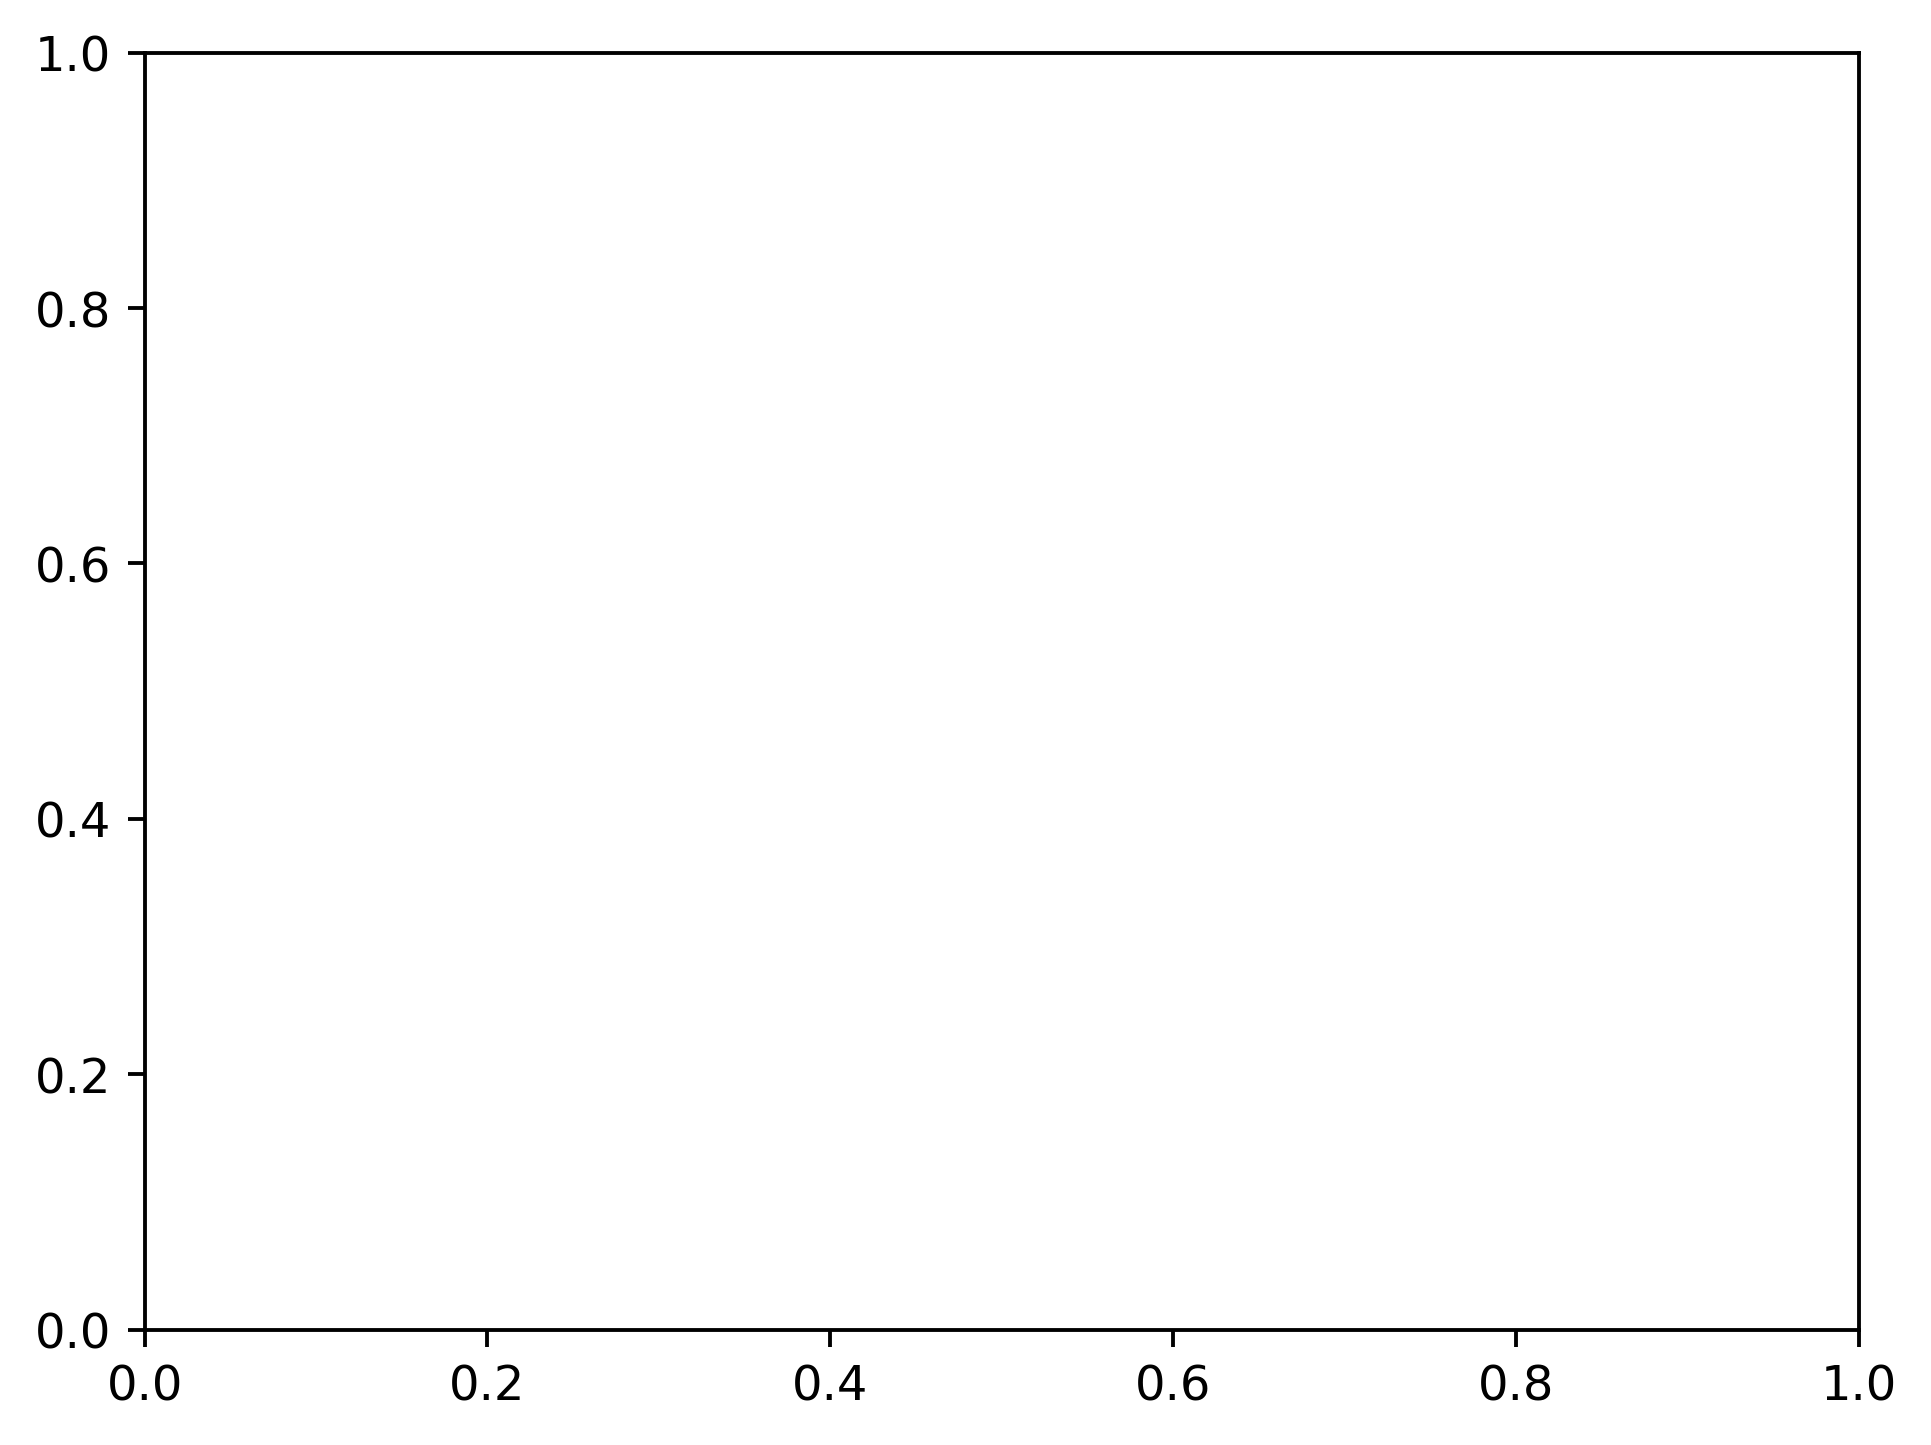

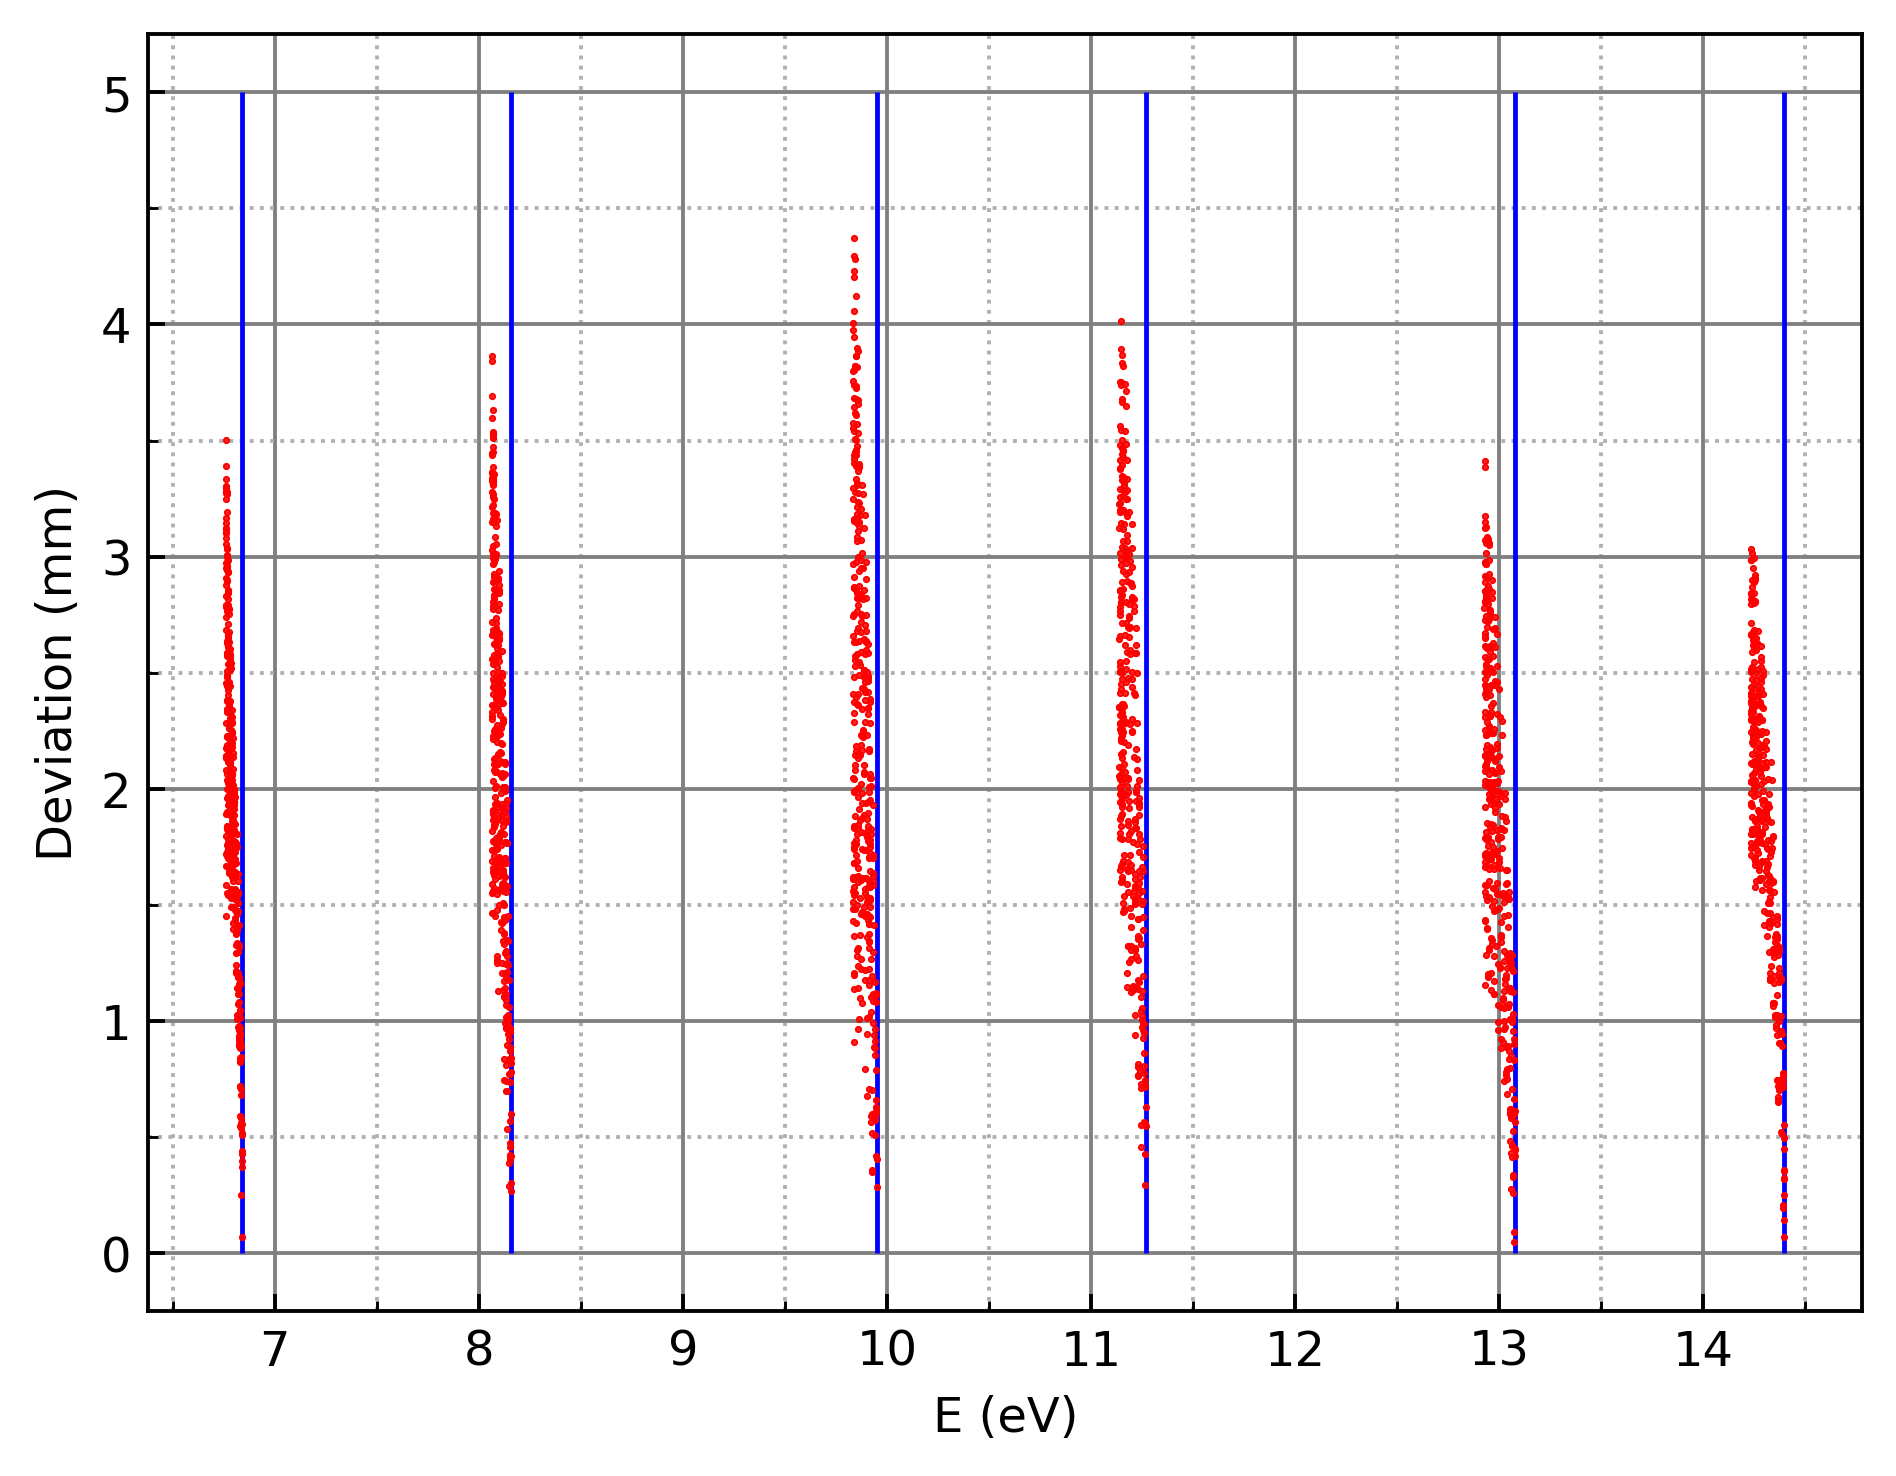

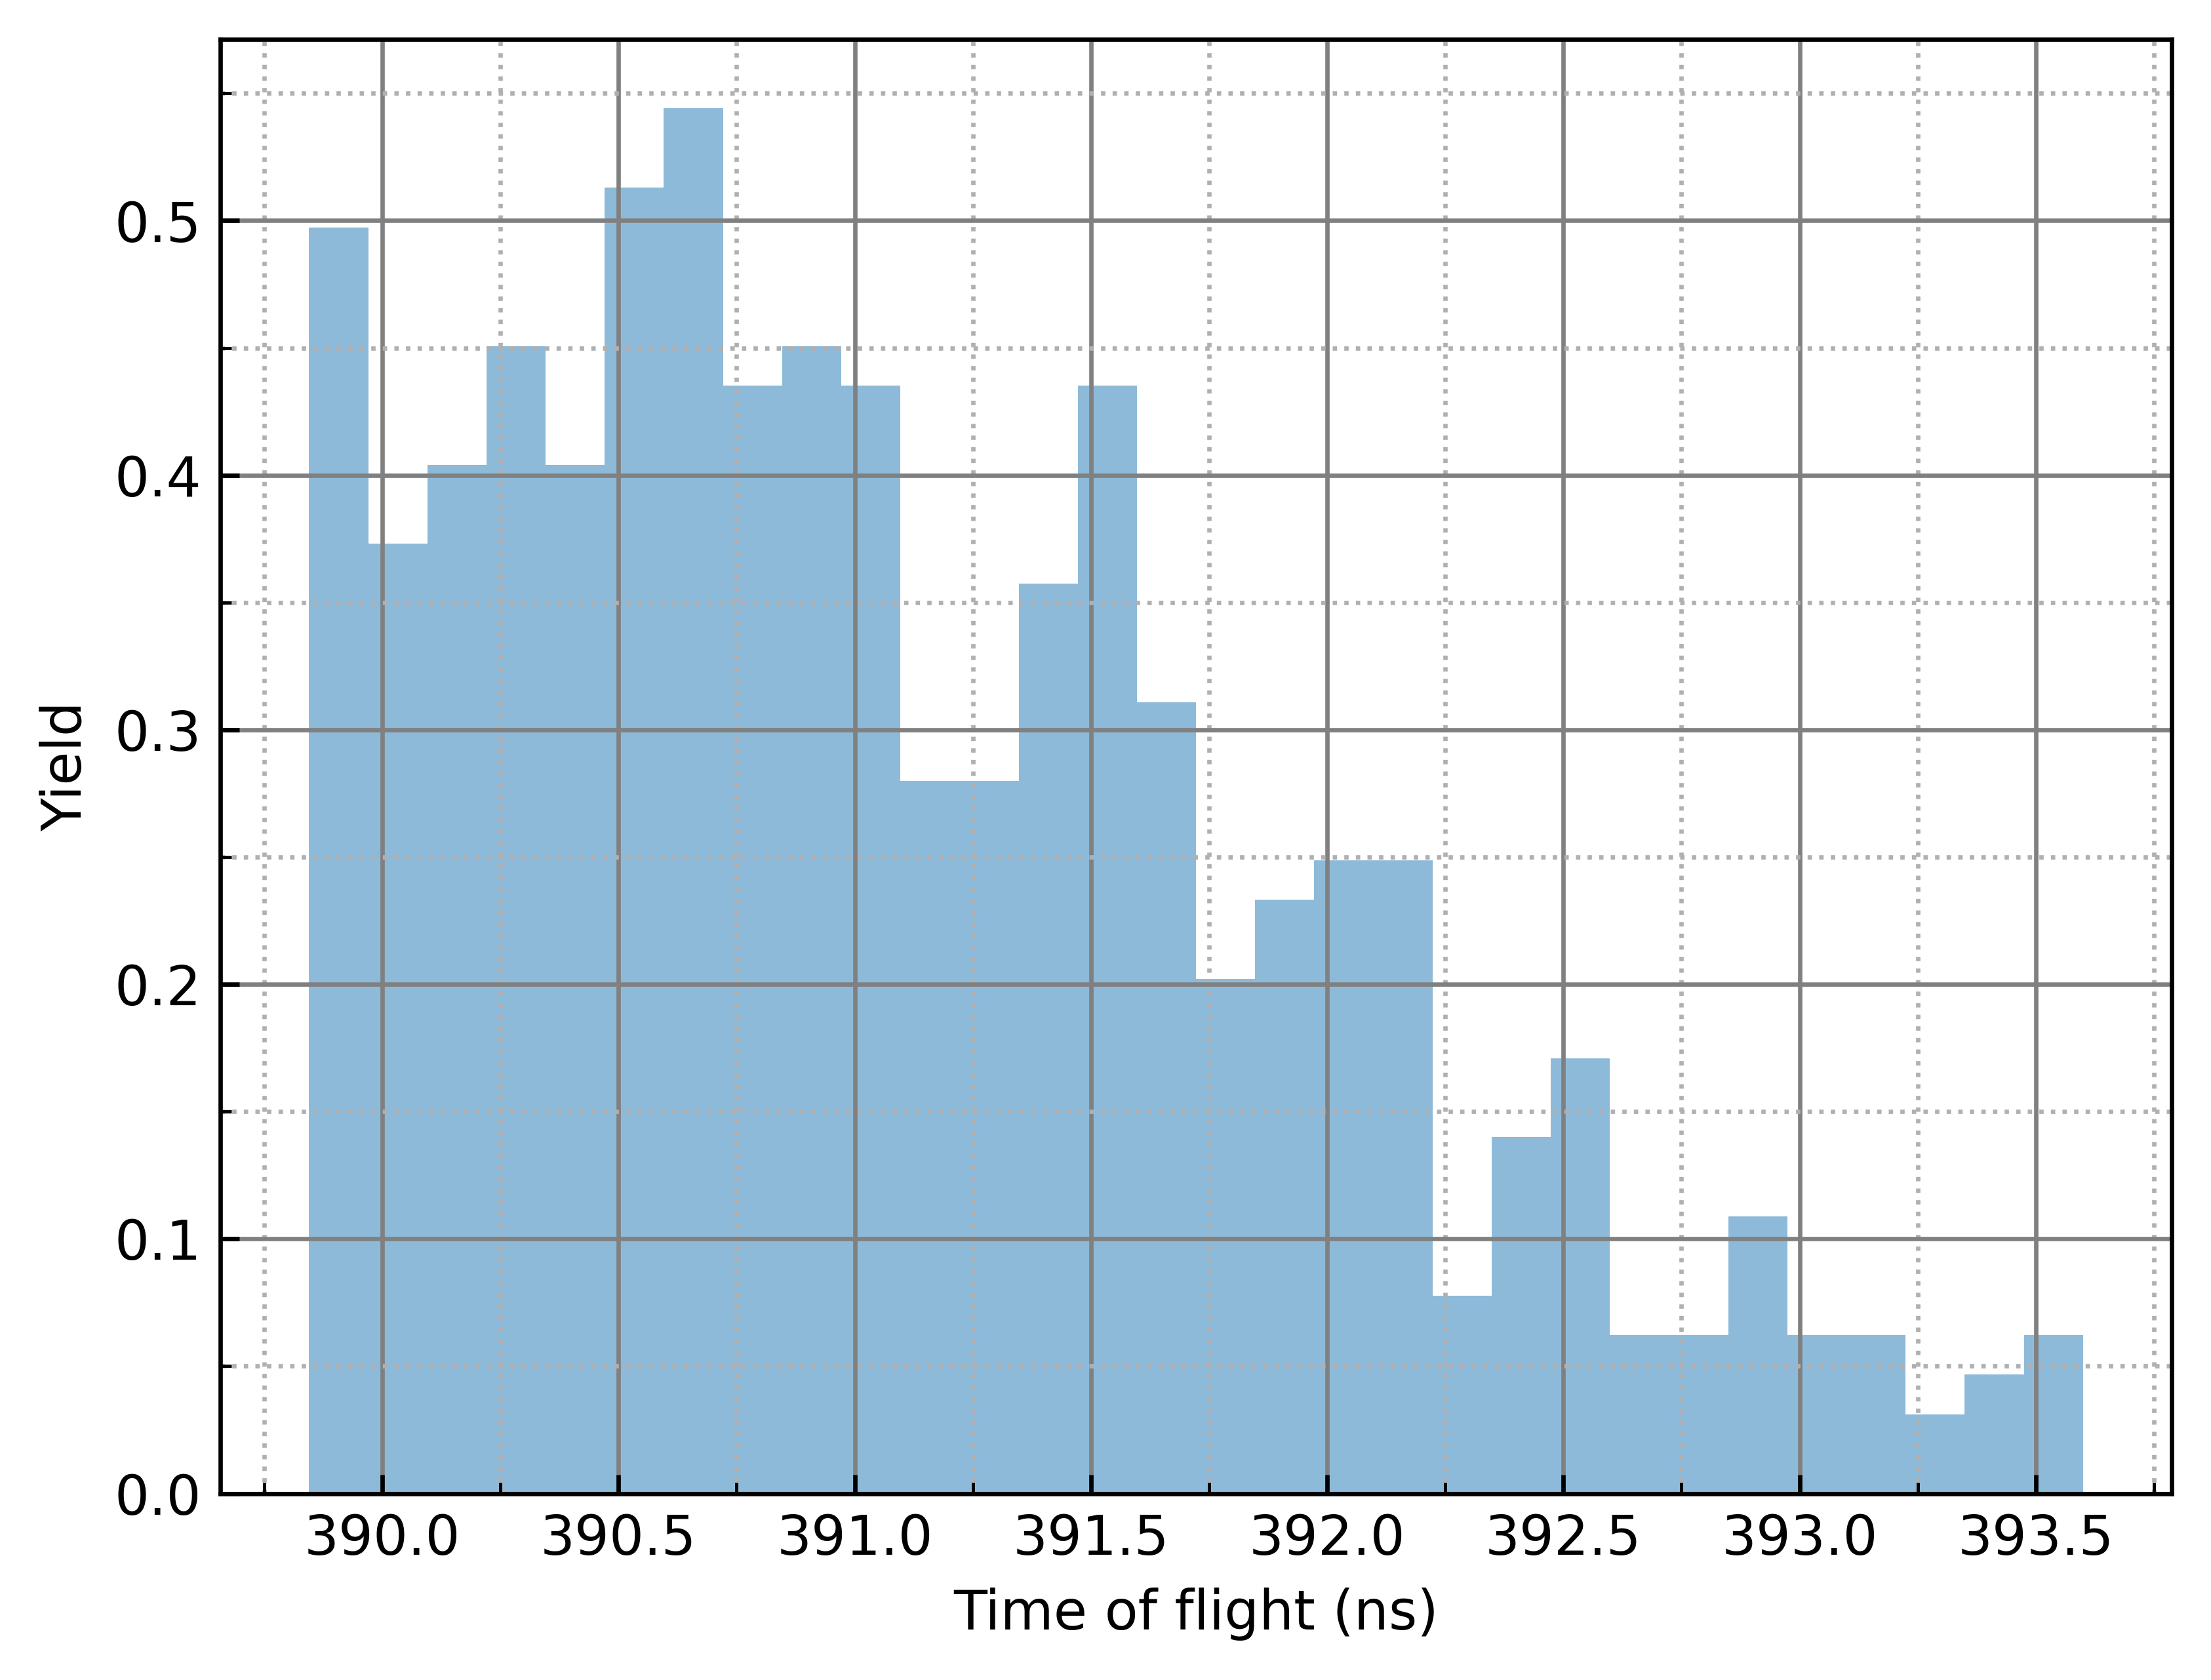

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from pylab import *
from scipy.optimize import curve_fit
from scipy.signal import peak_widths, find_peaks
from funcs import time_of_flight, decorate

fig, ax = plt.subplots(dpi=600)
x_start = 389
x_end = 393
x_interval = 0.5
y_start = 0
y_end = 1
y_interval = 0.1
decorate(ax, (x_start, x_end, x_interval), (y_start, y_end, y_interval),
    r"Time of flight (ns)", r"Yield", set=False)

data, _ = read_file('./data/1k_24ev.txt', delimeter=None)
y, x, _ = hist(data, 30, alpha=0.5, density=True)
x = (x[1:] + x[:-1]) / 2